In [1]:
import os
import tables as tb
import numpy  as np
from matplotlib import pyplot as plt

from invisible_cities.cities.dorothea        import Dorothea
from invisible_cities.core.system_of_units_c import units
from invisible_cities.core.configure         import configure
from invisible_cities.reco.dst_functions     import load_dst
from invisible_cities.io                     import pmap_io  as pio
from invisible_cities.core import fit_functions as fitf

In [2]:
run = -4446
ic_data = os.path.join(os.environ['IC_DATA'])
#pmap_path = ic_data + 'Montecarlo/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_pmaps_10000.root.h5'           # old MC
#pmap_path = '/Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5'                                 # data
pmap_path =  ic_data + 'Montecarlo/Kr/aug2017/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_2000.h5'  # new MC
conf_path = '/Users/alej/Desktop/Valencia/nextic/IC-1/invisible_cities/config/dorothea.conf'

In [3]:
# initialize dorothea
PATH_IN  = os.path.join(pmap_path)
PATH_OUT = os.path.join('/Users/alej/Desktop/dorothea/garbage.h5')
conf     = configure(('dummy ' + conf_path).split()).as_dict
conf.update(dict(run_number = run,
                 files_in   = PATH_IN,
                 file_out   = PATH_OUT,
                 nmax       = 100000))
dorothea = Dorothea(**conf)

In [4]:
dorothea.run()


                 Dorothea will run a max of 100000 events
                 Input Files = ['/Users/alej/Desktop/IC_DATA/Montecarlo/Kr/aug2017/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_2000.h5']
                 Output File = /Users/alej/Desktop/dorothea/garbage.h5
                          
Opening /Users/alej/Desktop/IC_DATA/Montecarlo/Kr/aug2017/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_2000.h5... event in file = 1, total = 1
event in file = 2, total = 2
event in file = 4, total = 3
event in file = 5, total = 4
event in file = 7, total = 5
event in file = 8, total = 6
event in file = 9, total = 7
event in file = 10, total = 8
event in file = 11, total = 9
event in file = 12, total = 10
event in file = 13, total = 11
event in file = 14, total = 12
event in file = 15, total = 13
event in file = 16, total = 14
event in file = 17, total = 15
event in file = 18, total = 16
event in file = 20, total = 17
event in file = 21, total = 18
event in file = 22, total = 19
event in file = 23, to

In [5]:
dst = load_dst('/Users/alej/Desktop/dorothea/garbage.h5', "DST", "Events")
dst

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,0,0.0,0,1,125.0,0.883872,4.763987,100100.0,5.4750,2697.054199,...,183500.0,6,83.400,83.400,-91.858836,110.024127,143.329530,2.266457,6.385627,4.999942
1,1,0.0,0,1,125.0,1.614822,8.703669,100125.0,9.3250,899.463135,...,427500.0,9,327.375,327.375,175.569774,-85.799594,195.413192,-0.454561,7.156545,6.820893
2,3,0.0,0,1,125.0,2.258757,8.702439,100100.0,7.4375,1933.902344,...,293500.0,7,193.400,193.400,-25.474383,-71.299747,75.713923,-1.913947,5.696118,6.042438
3,4,0.0,0,1,75.0,1.392848,4.749450,100125.0,9.2875,1174.591064,...,408500.0,7,308.375,308.375,-19.754264,175.840313,176.946451,1.682669,5.916417,6.354004
4,6,0.0,0,1,100.0,1.148198,4.218399,100150.0,5.3125,2706.124512,...,180500.0,6,80.350,80.350,146.194969,0.723610,146.196760,0.004950,5.720223,4.947362
5,7,0.0,0,1,150.0,2.271886,11.732689,100125.0,11.7000,1055.870850,...,610500.0,7,510.375,510.375,-105.868578,-50.748530,117.403446,-2.694598,7.189318,6.282658
6,8,0.0,0,1,150.0,1.636183,8.977185,100100.0,9.5875,1360.677490,...,399500.0,5,299.400,299.400,-100.959839,-68.298641,121.891728,-2.546818,4.907006,6.081336
7,9,0.0,0,1,150.0,2.310355,10.825065,100150.0,10.4500,674.149414,...,571500.0,7,471.350,471.350,47.942938,-185.562951,191.656292,-1.317961,6.406782,6.646361
8,10,0.0,0,1,175.0,2.347033,15.973521,100100.0,12.5000,990.919556,...,632500.0,6,532.400,532.400,45.916196,-20.085870,50.117255,-0.412365,6.643436,4.999263
9,11,0.0,0,1,75.0,1.539343,4.802296,100100.0,10.6000,925.854614,...,530500.0,6,430.400,430.400,27.668305,-157.678911,160.088020,-1.397092,6.097509,6.450947


In [6]:
events_in_dst = dst.event.values
n_events_represented_in_dst = len(set(events_in_dst))
print('Event efficiency: ' + str(n_events_represented_in_dst / dorothea.cnt.cd['n_events_tot']))

Event efficiency: 0.834


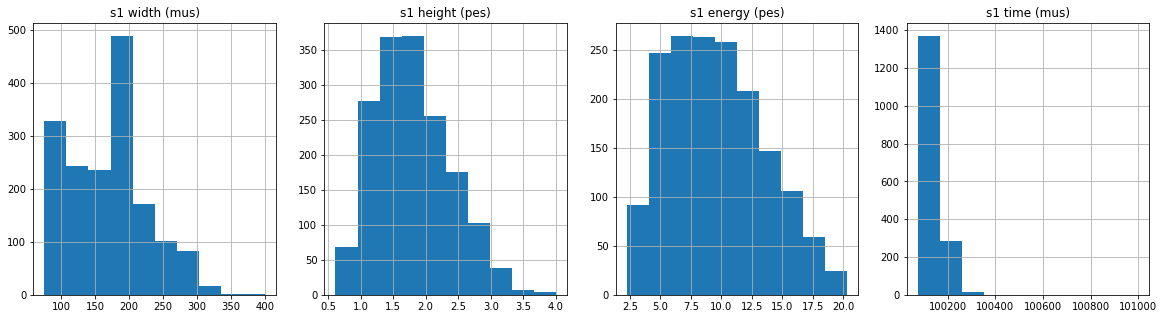

In [7]:
plt.figure(figsize=(20,5))
subplot=141
for feature, lab in zip([dst.S1w, dst.S1h, dst.S1e, dst.S1t], 
                   ['s1 width (mus)', 's1 height (pes)', 's1 energy (pes)', 's1 time (mus)']):
    plt.subplot(subplot)
    if lab=='s1 time':plt.hist(feature / units.mus)
    else:plt.hist(feature)
    plt.title(lab)
    plt.grid(True)
    subplot+=1
plt.show()  

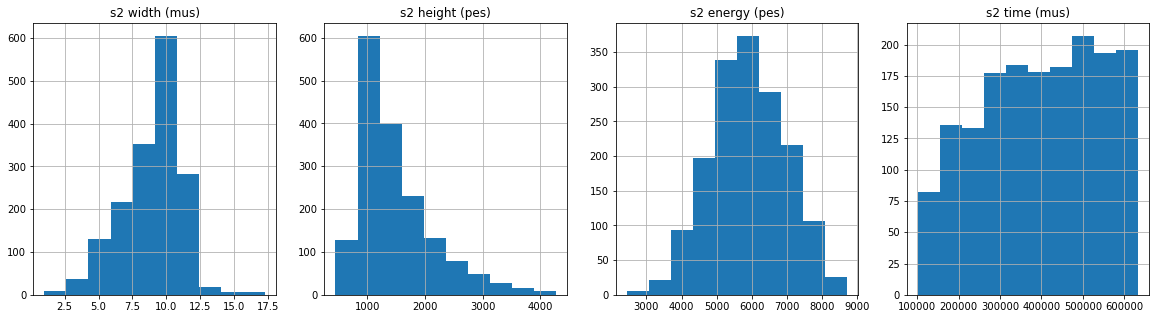

In [8]:
plt.figure(figsize=(20,5))
subplot=141
for feature, lab in zip([dst.S2w, dst.S2h, dst.S2e, dst.S2t], 
                   ['s2 width (mus)', 's2 height (pes)', 's2 energy (pes)', 's2 time (mus)']):
    plt.subplot(subplot)
    if lab=='s2 time':plt.hist(feature / units.mus)
    else:plt.hist(feature)
    plt.title(lab)
    plt.grid(True)
    #plt.yscale('log')
    subplot+=1
plt.show()  

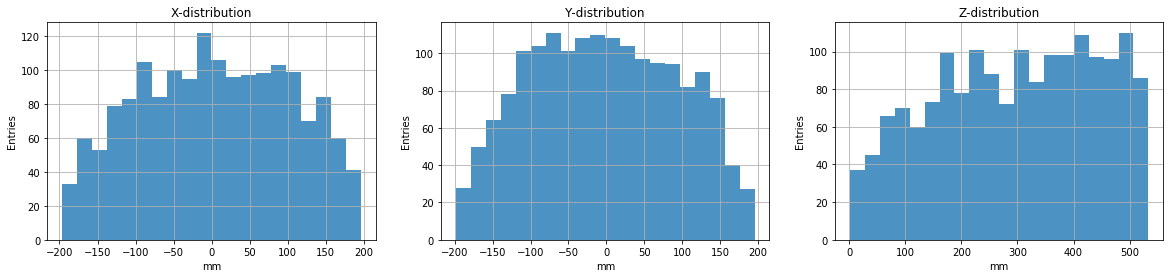

In [9]:
plt.figure(figsize=(20,4))
subplot=131
for feature, coord in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist(feature, bins=20, alpha=.8)
    plt.title(coord + '-distribution')
    plt.xlabel('mm')
    plt.ylabel('Entries')
    plt.grid(True)
    subplot+=1
plt.show()

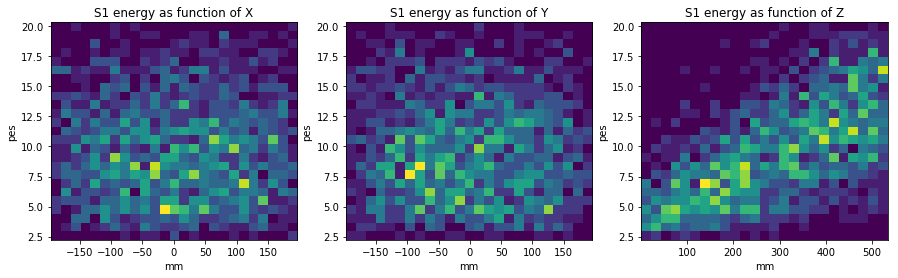

In [10]:
plt.figure(figsize=(15,4))
subplot=131
for feature, lab in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist2d(feature, dst.S1e, bins=25)
    plt.title('S1 energy as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    subplot+=1
plt.show()

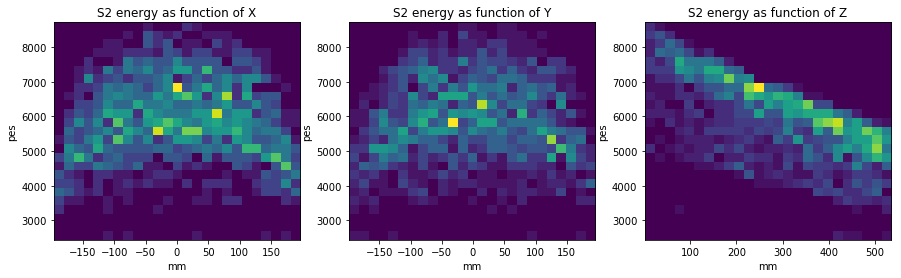

In [11]:
plt.figure(figsize=(15,4))
subplot=131
for feature, lab in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist2d(feature, dst.S2e, bins=25)
    plt.title('S2 energy as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    #plt.ylim(2e3,2.5e3)
    subplot+=1
plt.show()

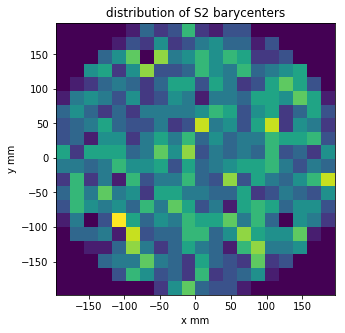

In [14]:
plt.figure(figsize=(5,5))
plt.hist2d(dst.X, dst.Y, bins=(20, 20))
plt.xlabel('x mm') 
plt.ylabel('y mm')
plt.title('distribution of S2 barycenters')
plt.show()

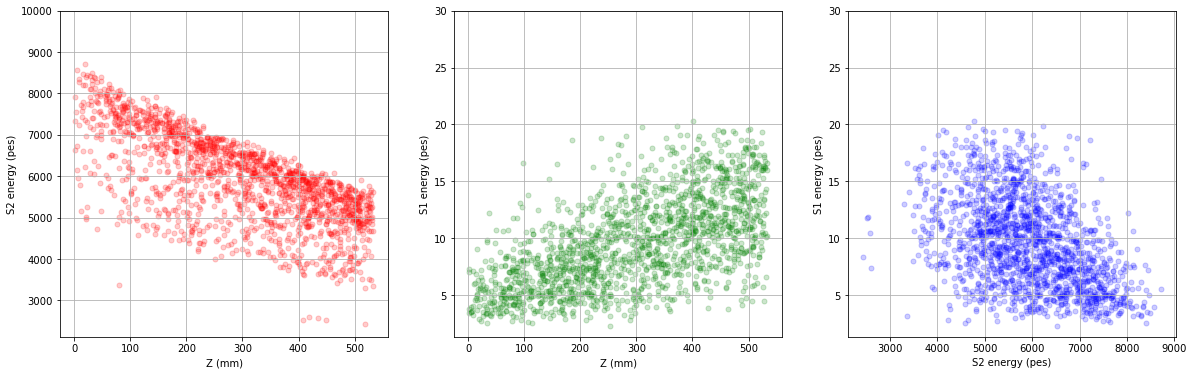

In [16]:
figsize=(20,6)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 3, 1)
#plt.hist2d(dst.Z, dst.S2e, bins=(25, 25))
plt.scatter(dst.Z, dst.S2e, c='r', s=25, alpha=.2)
plt.xlabel('Z (mm)')
plt.ylabel('S2 energy (pes)')
plt.ylim(None,10000)

plt.grid(True)

ax = plt.subplot(1, 3, 2)
#plt.hist2d(dst.Z, dst.S1e, bins=(25, 25))
plt.scatter(dst.Z, dst.S1e, c='g', s=25, alpha=.2)
plt.xlabel('Z (mm)')
plt.ylabel('S1 energy (pes)')
plt.ylim(None,30)

plt.grid(True)

ax = plt.subplot(1, 3, 3)
#plt.hist2d(dst.S2e, dst.S1e, bins=(25, 25))
plt.scatter(dst.S2e, dst.S1e, c='b', s=25, alpha=.2)
plt.xlabel('S2 energy (pes)')
plt.ylabel('S1 energy (pes)')
plt.ylim(None,30)
plt.grid(True)
plt.show()

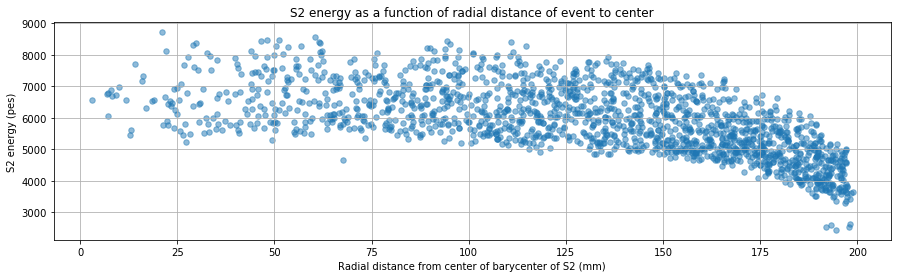

In [17]:
plt.figure(figsize=(15,4))
plt.scatter(dst.R, dst.S2e, s=30, alpha=.5)
plt.grid(True)
plt.title('S2 energy as a function of radial distance of event to center')
plt.xlabel('Radial distance from center of barycenter of S2 (mm)')
plt.ylabel('S2 energy (pes)')
#plt.ylim(None,20000)
plt.show()

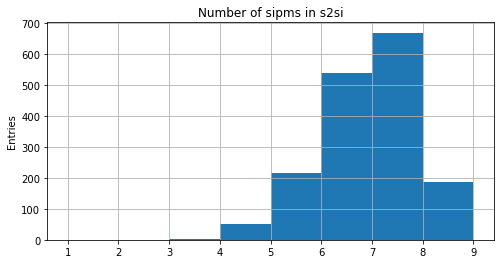

In [18]:
plt.figure(figsize=(8,4))
plt.hist(dst.Nsipm, bins=range(1, dst.Nsipm.max()+1))
plt.grid(True)
#plt.xlim(None,40)
plt.ylabel('Entries')
plt.title('Number of sipms in s2si')
plt.show()